<a href="https://colab.research.google.com/github/ReemJbily/Music-Genre-Classification/blob/main/music_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LogisticRegression,Lasso,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier



from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import StackingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy import stats

#Import Data

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/INternship/grad project2/train.csv')
test=pd.read_csv('/content/drive/MyDrive/INternship/grad project2/test.csv')

#Data Analysis

In [ ]:
print('the train data has {} columns and {} rows'.format(train.shape[1],train.shape[0]))
print('the test data has {} columns and {} rows'.format(test.shape[1],test.shape[0]))

the train data has 18 columns and 9412 rows
the test data has 17 columns and 3600 rows


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 1 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  9412 non-null   int64  
 1   Artist Name         9412 non-null   object 
 2   Track Name          9412 non-null   object 
 3   Popularity          9412 non-null   float64
 4   danceability        9412 non-null   float64
 5   energy              9412 non-null   float64
 6   key                 9412 non-null   float64
 7   loudness            9412 non-null   float64
 8   mode                9412 non-null   int64  
 9   speechiness         9412 non-null   float64
 10  acousticness        9412 non-null   float64
 11  instrumentalness    9412 non-null   float64
 12  liveness            9412 non-null   float64
 13  valence             9412 non-null   float64
 14  tempo               9412 non-null   float64
 15  duration_in min/ms  9412 non-null   float64
 16  time_

In [ ]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9.412000e+03,9412.000000,9412.000000
mean,7182.309286,43.168721,0.524349,0.669794,5.972907,-8.211778,0.625797,0.071122,0.239737,0.179897,0.194727,0.468743,123.063930,2.124931e+05,3.915002,6.629941
std,4175.636870,16.566433,0.165417,0.243421,3.167315,4.267179,0.483942,0.068123,0.319015,0.304346,0.159714,0.244040,29.449393,1.153708e+05,0.377904,3.246277
min,2.000000,1.000000,0.064400,0.001240,1.000000,-36.214000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3557.750000,32.000000,0.413000,0.510750,3.000000,-10.005500,0.000000,0.034600,0.001820,0.000093,0.096700,0.270000,100.012750,1.752262e+05,4.000000,5.000000
50%,7166.500000,43.000000,0.526000,0.716000,6.000000,-7.309000,1.000000,0.046100,0.056850,0.004310,0.127000,0.458000,120.061500,2.174910e+05,4.000000,8.000000
75%,10795.250000,54.000000,0.636000,0.876250,9.000000,-5.311000,1.000000,0.076500,0.419000,0.211000,0.253250,0.658000,141.907000,2.633570e+05,4.000000,10.000000
max,14396.000000,98.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.935000,0.996000,0.996000,0.992000,0.980000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.3800,132.921,191956.000000,4,6
5,6,Beck,Fuckin With My Head (Mountain Dew Rock),38.0,0.657,0.813,7.0,-7.861,1,0.2160,0.008340,0.049200,0.2080,0.5890,82.035,219587.000000,4,10
6,7,Shadow and Light,Blue,11.0,0.658,0.431,1.0,-12.718,0,0.0300,0.615000,0.292000,0.0902,0.5280,132.045,3.893933,5,0
7,8,Within The Ruins,Devil In Me,45.0,0.441,0.994,7.0,-2.934,1,0.2390,0.000073,0.000147,0.3820,0.0478,139.931,213125.000000,4,8
9,10,Day Sulan,Bailar,58.0,0.852,0.535,7.0,-5.940,0,0.0896,0.439000,0.000082,0.2460,0.4830,103.007,205056.000000,4,5


In [ ]:
train.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
#columns [popularity, key, instrumentalness ] has null values

In [ ]:
train.fillna(-1.0,inplace=True)

In [ ]:
train.drop('Id',axis=1).corr()

<ipython-input-13-f0a6cbf3cccd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.drop('Id',axis=1).corr()


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,1.000000,0.150423,0.056658,0.014157,0.107584,0.002349,-0.005086,-0.127827,-0.169138,-0.078768,0.057260,0.004316,0.005262,0.073967,0.167202
danceability,0.150423,1.000000,-0.091171,0.011338,0.043601,-0.055355,0.106994,0.023827,-0.203031,-0.113663,0.454353,-0.176867,-0.122413,0.118958,-0.115610
energy,0.056658,-0.091171,1.000000,0.027024,0.793044,-0.041969,0.180759,-0.758749,-0.175861,0.197962,0.215924,0.214956,0.254625,0.138728,0.217663
key,0.014157,0.011338,0.027024,1.000000,0.018124,-0.116908,0.000031,-0.017613,-0.003804,0.015359,0.034677,0.018792,0.020355,0.007664,0.007158
loudness,0.107584,0.043601,0.793044,0.018124,1.000000,-0.036329,0.124441,-0.643064,-0.339755,0.118982,0.185504,0.170358,0.206686,0.115369,0.160725
mode,0.002349,-0.055355,-0.041969,-0.116908,-0.036329,1.000000,-0.042340,0.024950,-0.007763,-0.018815,-0.006070,0.013929,-0.061291,-0.006021,-0.029513
speechiness,-0.005086,0.106994,0.180759,0.000031,0.124441,-0.042340,1.000000,-0.099593,-0.071010,0.083939,0.007973,0.089371,0.008818,0.038287,-0.018164
acousticness,-0.127827,0.023827,-0.758749,-0.017613,-0.643064,0.024950,-0.099593,1.000000,0.173870,-0.108914,-0.127934,-0.172389,-0.350481,-0.142333,-0.252490
instrumentalness,-0.169138,-0.203031,-0.175861,-0.003804,-0.339755,-0.007763,-0.071010,0.173870,1.000000,-0.041942,-0.225034,-0.024161,-0.000494,-0.069481,-0.035133
liveness,-0.078768,-0.113663,0.197962,0.015359,0.118982,-0.018815,0.083939,-0.108914,-0.041942,1.000000,0.020828,0.027629,0.060140,0.006907,0.039757


In [ ]:
train['Class'].value_counts()

10    2688
6     1611
8     1222
9      887
1      833
2      760
5      405
7      372
0      302
3      214
4      118
Name: Class, dtype: int64

#Data Visulaization

[Text(0, 0, 'Popularity'),
 Text(1, 0, 'danceability'),
 Text(2, 0, 'energy'),
 Text(3, 0, 'key'),
 Text(4, 0, 'loudness'),
 Text(5, 0, 'mode'),
 Text(6, 0, 'speechiness'),
 Text(7, 0, 'acousticness'),
 Text(8, 0, 'instrumentalness'),
 Text(9, 0, 'valence'),
 Text(10, 0, 'tempo'),
 Text(11, 0, 'Class')]

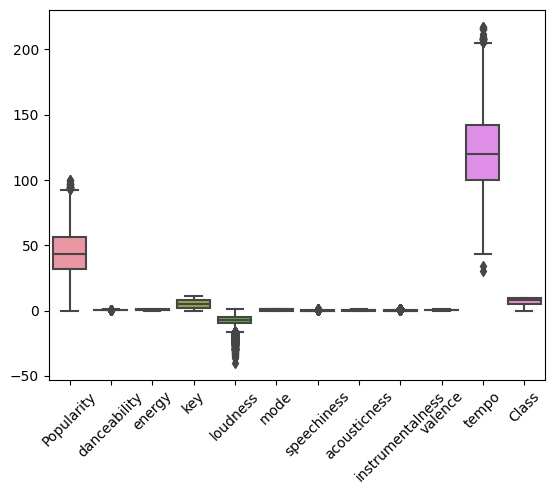

In [ ]:
ax=sns.boxplot(train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


<Axes: >

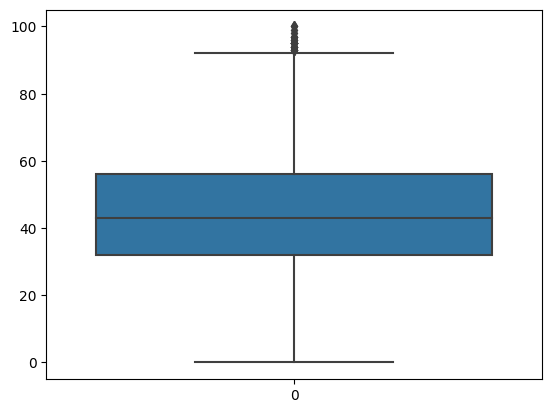

In [ ]:
sns.boxplot(train['Popularity'])

In [ ]:
#90-100

<Axes: >

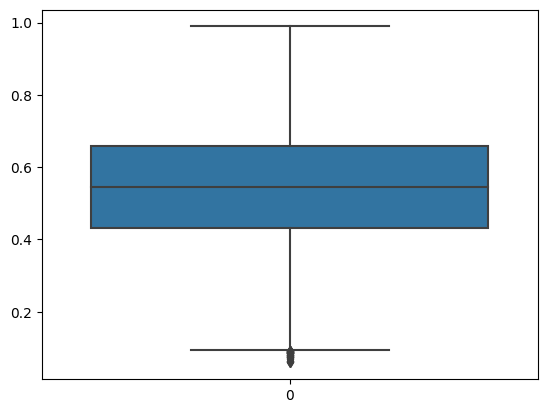

In [ ]:
sns.boxplot(train['danceability'])

In [ ]:
#<0.1

<Axes: >

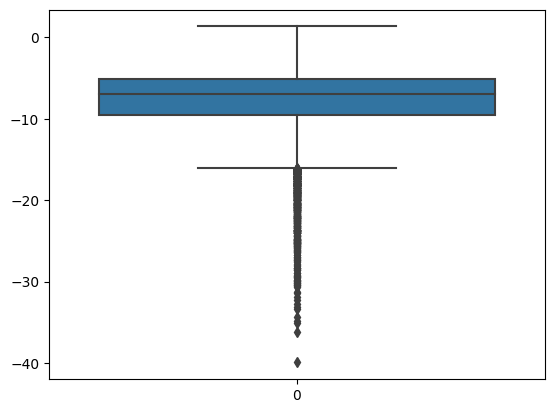

In [ ]:
sns.boxplot(train['loudness'])

In [ ]:
#<-18

<Axes: >

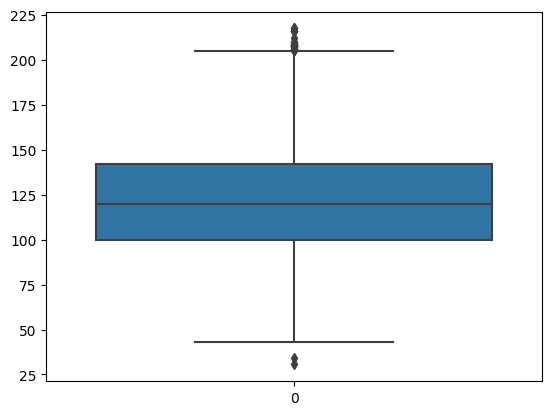

In [ ]:
sns.boxplot(train['tempo'])

In [ ]:
#-40-15

In [ ]:
#215 - 220
#0 -40

In [ ]:
sns.pairplot(train.drop(['Id','Artist Name','Track Name','liveness','time_signature','key','mode'],axis=1))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=train['loudness'],y=train['energy'],alpha=0.5)
plt.title('enrergy/loudness relation')
plt.x_lable('loudness')
plt.y_lable('energy')

<ipython-input-50-7713ce578bbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.drop(['Id','liveness','time_signature','key','mode'],axis=1).corr(),vmin=-1,vmax=1,annot=True)


Text(0.5, 1.0, 'Correlation between features')

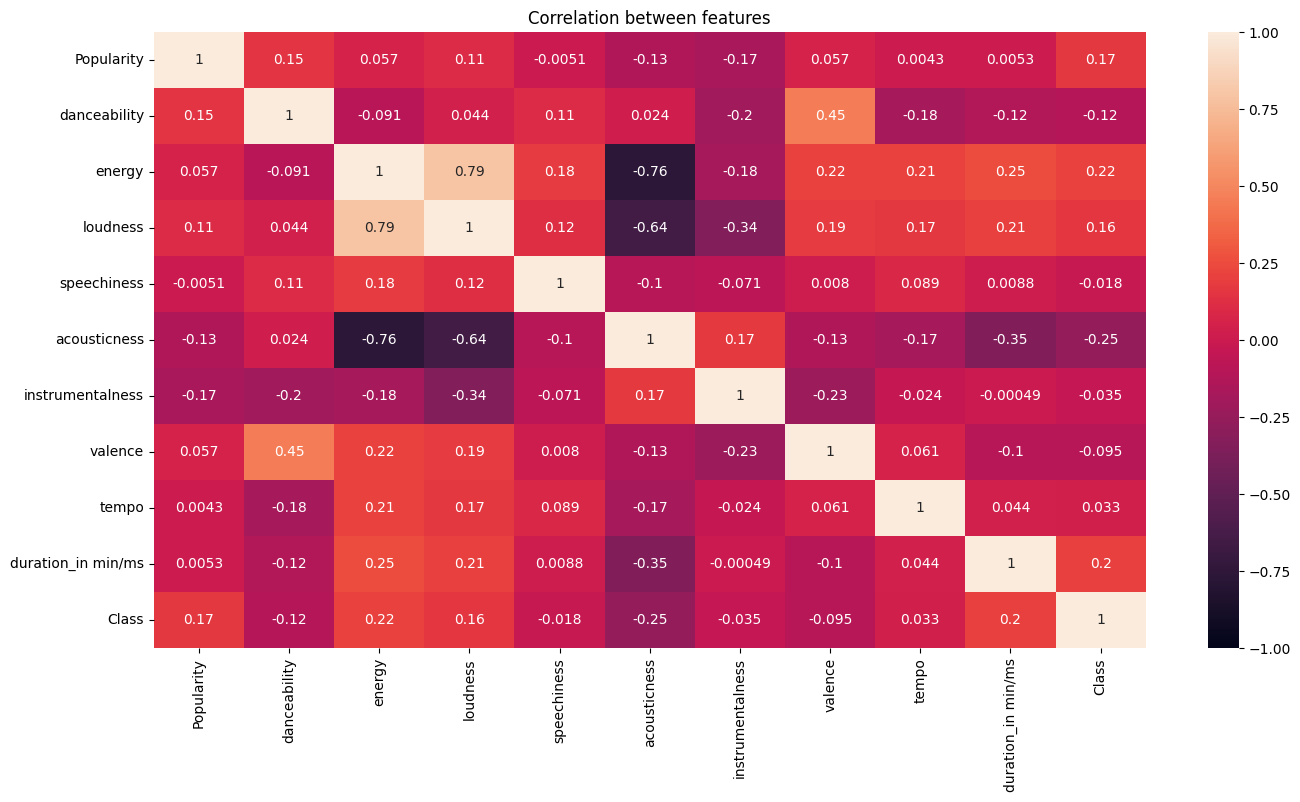

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(train.drop(['Id','liveness','time_signature','key','mode'],axis=1).corr(),vmin=-1,vmax=1,annot=True)
plt.title('Correlation between features')

#Data preprocessing

In [ ]:
train=train.dropna()

In [ ]:
train = train[(train["Popularity"]<90)]
train = train[(train["loudness"]>-18)]
train = train[(train["tempo"]>40)&(train["tempo"]<210)]

In [ ]:
train.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

#Select and Train the Model

In [ ]:
X=train.drop(['Id','Artist Name','Track Name','key', 'mode',
       'liveness', 'time_signature','Class'],axis=1)
y=train['Class']

In [ ]:
X.isna().sum()

loudness              0
speechiness           0
instrumentalness      0
tempo                 0
duration_in min/ms    0
dtype: int64

In [ ]:
over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy={10:1500})
X_re, y_re = over.fit_resample(X, y)
X_re, y_re=under.fit_resample(X_re,y_re)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_re,y_re,test_size=0.2,random_state=42)

In [ ]:
num_attribs=[]
cat_attribs=[]
for name in list(X):
  if name =='Artist name' or name == 'Track Name':
    cat_attribs.append(name)
  else:
    num_attribs.append(name)


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self,X, y=None):
        return self
    def transform(self, x_train, y=None):
        np.seterr(invalid='ignore')
      #train['energy']*(36.214+train['loudness'])*np.sqrt(3+train['acousticness'])
        mx=x_train[:,3].max()
        m=x_train[:,2]*(mx+x_train[:,3])*np.sqrt(3+x_train[:,5])
        return np.c_[x_train,m]

num_pipeline=Pipeline(
    [   ('imputer',SimpleImputer(strategy="median")), #to avoid any null values coming from adding the new cloumn[s]
        ('attribs_adder', CombinedAttributesAdder()), #adding the volumn column
        ('std_scaler', StandardScaler())] #scaling data
)
cat_pipeline=Pipeline(
    [
     ('lable_encoder',LabelEncoder()), #catigorical data are ordered, so we use ordinal encoder
     ('std_scaler',StandardScaler()) #scaling data
]
    )
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs)
    ])


In [ ]:
#logistic regression
logistic_regression=Pipeline([('pipeline',full_pipeline),
                    ('logistic_regression',LogisticRegression(max_iter=1000))])
logistic_regression.fit(x_train,y_train)

In [ ]:
#knn
knn=Pipeline([('pipeline',full_pipeline),
              ('knn',KNeighborsClassifier(metric='manhattan', n_neighbors=29))])
knn.fit(x_train,y_train)

In [ ]:
#random forest
rf=Pipeline([('pipeline',full_pipeline),
              ('rf',RandomForestClassifier(n_estimators=1000))])
rf.fit(x_train,y_train)

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Popularity', 'danceability',
                                                   'energy', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'valence', 'tempo',
                                                   'duration_in min/ms'])])),
                ('rf', RandomForestClassifier(n_estimators=1000))])

In [ ]:
#xgb
xgb=Pipeline([('pipeline',full_pipeline),
              ('xgb',XGBClassifier())])
xgb.fit(x_train,y_train)

In [ ]:
#sgd
sgd=Pipeline([('pipeline',full_pipeline),
              ('sgd',SGDClassifier())])
sgd.fit(x_train,y_train)

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Popularity', 'danceability',
                                                   'energy', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'valence', 'tempo',
                                                   'duration_in min/ms'])])),
                ('sgd', SGDClassifier())])

In [ ]:
param_grid = {
    "loss": ["log_loss"],
    "learning_rate": [0.1],
    "n_estimators": [1000],
    "min_samples_split": [3],
    "min_samples_leaf":[5],
    "criterion":["friedman_mse"],
    "max_depth":[3],
    "random_state":[42],
    "max_features":["sqrt"]
}
gr =Pipeline([('pipeline',full_pipeline),
              ('gr',GradientBoostingClassifier(n_estimators=1000))])
gr.fit(x_train,y_train)

Pipeline(steps=[('pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Popularity', 'danceability',
                                                   'energy', 'loudness',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'valence', 'tempo',
                                                   'duration_in min/ms'])])),
                ('gr', GradientBoostingClassifier(n_estimators=1000))])

#Fine Tuning the model

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']#Algorithm to use in the optimization problem.
penalty = ['l2']#Regularization, squre magnitude
c_values = [100, 200, 1.0, 0.1, 0.01]#strength of the penality
grid = {'logistic_regression__solver':solvers,'logistic_regression__penalty':penalty,'logistic_regression__C':c_values}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)

In [ ]:
grid_result.best_estimator_

In [ ]:
n_neighbors = range(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = {'knn__n_neighbors':n_neighbors,
            'knn__weights':weights,
            'knn__metric':metric}
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
y_train

In [ ]:
knn_grid_result.best_estimator_
#metric='manhattan', n_neighbors=19

In [ ]:
++++n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
rf_grid = {'rf__n_estimators':n_estimators,
            'rf__max_features':max_features}
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
rf_grid_result = rf_grid_search.fit(X,y)

In [ ]:
rf_grid_result.best_estimator_
#n_estimators=1000

In [ ]:
gamma=[0,0.1,0.3,1.6]
learning_rate=[0.01, 0.1,0.3]
max_depth=[6,10,14]

xgb_grid={'xgb__n_estimators':[200],
           'xgb__gamma':gamma,
            'xgb__learning_rate':learning_rate,
           'xgb__max_depth':max_depth}
xgb_grid_search=GridSearchCV(estimator=xgb, param_grid=xgb_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
xgb_grid_result = xgb_grid_search.fit(X,y)


#Save tunned models

In [ ]:
dump(grid_result.best_estimator_, "./logistic_regression.joblib")
dump(knn_grid_result.best_estimator_, "./knn.joblib")
dump(rf_grid_result.best_estimator_, "./random_forest.joblib")
dump(xgb_grid_result.best_estimator_, "./xgb.joblib")

#Ensemble learning

In [ ]:
stacking_rf_gr=StackingClassifier(
estimators=[
('rf', rf),
('gr',gr)
]
)
stacking_rf_gr.fit(x_train,y_train)

#Model Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [ ]:
def accuracy(model,input_data=x_test,lable=y_test,scoring_='accuracy',cv_=5):
  return cross_val_score(model, input_data, lable,
                          scoring=scoring_,cv=cv_)

In [ ]:
def predict(model,data=x_test,lable=y_test,cv_=3):
  return cross_val_predict(model,data,lable,cv=cv_)

In [ ]:
logistic_regression_pred=predict(logistic_regression)
ConfusionMatrixDisplay.from_predictions(y_test, logistic_regression_pred,normalize="true",
values_format=".0%")
plt.title('logistic regression')

In [ ]:
knn_pred=predict(knn)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred,normalize="true",
values_format=".0%")
plt.title('knn')

In [ ]:
rf_pred=predict(rf)
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred,normalize="true",
values_format=".0%")
plt.title('random forest')

In [ ]:
xgb_pred=predict(xgb)
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred,normalize="true",
values_format=".0%")
plt.title('xgboost')

In [ ]:
sgd_pred=predict(sgd)
ConfusionMatrixDisplay.from_predictions(y_test, sgd_pred,normalize="true",
values_format=".0%")
plt.title('SGD classifier')

In [ ]:
gr_pred=predict(gr)
ConfusionMatrixDisplay.from_predictions(y_test, gr_pred,normalize="true",
values_format=".0%")
plt.title('gradient boosting')

In [ ]:
voting_rf_gr_pred=predict(voting_rf_gr)
ConfusionMatrixDisplay.from_predictions(y_test, voting_rf_gr_pred,normalize="true",
values_format=".0%")
plt.title('voting logistic regression/gradient boosting')

In [ ]:
stacking_rf_gr_pred=predict(stacking_rf_gr)
ConfusionMatrixDisplay.from_predictions(y_test, stacking_rf_gr_pred,normalize="true",
values_format=".0%")
plt.title('stacking random forest/gradient boosting')

In [ ]:
#stacking_xgb_gr
stacking_xgb_gr_pred=stacking_xgb_gr.predict(X)
ConfusionMatrixDisplay.from_predictions(y, stacking_xgb_gr_pred,normalize="true",
values_format=".0%")
plt.title('stacking XGB/gradient boosting')

In [ ]:

model_performance={
    'logistic regression':[accuracy_score(y_test,logistic_regression_pred),precision_score(y_test,logistic_regression_pred,average='micro'),recall_score(y_test,logistic_regression_pred,average='micro'),f1_score(y_test,logistic_regression_pred,average='micro')],
    'KNN':[accuracy_score(y_test,knn_pred),precision_score(y_test,knn_pred,average='micro'),recall_score(y_test,knn_pred,average='micro'),f1_score(y_test,knn_pred,average='micro')],
    'random forest':[accuracy_score(y_test,rf_pred),precision_score(y_test,rf_pred,average='micro'),recall_score(y_test,rf_pred,average='micro'),f1_score(y_test,rf_pred,average='micro')],
    'XGB':[accuracy_score(y_test,xgb_pred),precision_score(y_test,xgb_pred,average='micro'),recall_score(y_test,xgb_pred,average='micro'),f1_score(y_test,xgb_pred,average='micro')],
    'SGD':[accuracy_score(y_test,sgd_pred),precision_score(y_test,sgd_pred,average='micro'),recall_score(y_test,sgd_pred,average='micro'),f1_score(y_test,sgd_pred,average='micro')],
    'Gradient boosting':[accuracy_score(y_test,gr_pred),precision_score(y_test,gr_pred,average='micro'),recall_score(y_test,gr_pred,average='micro'),f1_score(y_test,gr_pred,average='micro')],
    'stacking_rf_gr_pred':[accuracy_score(y_test,stacking_rf_gr_pred),precision_score(y_test,stacking_rf_gr_pred,average='micro'),recall_score(y_test,stacking_rf_gr_pred,average='micro'),f1_score(y_test,stacking_rf_gr_pred,average='micro')]

}
ml = pd.DataFrame(columns=['model name','accuracy','precision','recall','f1'])
keys=list(model_performance.keys())
for i in range(len(keys)):
    ml.loc[i, 'model name'] = keys[i]
    ml.loc[i, 'accuracy'] = model_performance[keys[i]][0]
    ml.loc[i,'precision']=model_performance[keys[i]][1]
    ml.loc[i, 'recall'] = model_performance[keys[i]][2]
    ml.loc[i,'f1']=model_performance[keys[i]][3]

ml

#Save Results

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/INternship/grad project2/test.csv')

In [ ]:
Id=test['Id']
test=test.drop(['Id','Artist Name','Track Name','liveness','time_signature','key','mode'],axis=1)


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/INternship/grad project2/test.csv')
Id=test['Id']

test=test.drop(['Id','Artist Name','Track Name','key', 'mode',
       'liveness', 'time_signature'],axis=1)

In [ ]:
pred=stacking_rf_gr.predict(test)
stacking_rf_gr_data={'Id': Id, 'Class':pred }

sub = pd.DataFrame(data=stacking_rf_gr_data)
sub.to_csv('./stacking_rf_gr.csv',index=False)
pred